In [119]:
import numpy as np

### 스핀 행렬

In [120]:
def func1(L):
    data = np.random.choice([-1, 1], size=(L, L)) # -1과 1 중에서 무작위로 LxL 개 뽑음
    return data

In [121]:
# 코드 작성에 활용할 연습용 데이터 beta
beta = func1(5)
print(beta)

[[ 1  1 -1  1 -1]
 [ 1  1 -1  1  1]
 [ 1 -1 -1  1  1]
 [-1 -1  1 -1 -1]
 [ 1  1 -1  1 -1]]


### 각 노드의 이웃 노드

In [122]:
def neighbor(array, n): # n번째 노드의 이웃 노드 인덱스(상하좌우 4개)를 찾음
    L, _ = array.shape

    # 상
    up = n-L # 윗쪽으로 한 칸 이동
    if up < 0: # 이동 전이 맨 윗쪽 열인 경우,
        up += L*L # 아랫쪽으로 L칸 이동하여 주기적 경계 조건 만족

    # 하
    down = n+L # 아랫쪽으로 한 칸 이동
    if down >= L*L: # 이동 전이 맨 아랫쪽 열인 경우,
        down -= L*L # 윗쪽으로 L칸 이동하여 주기적 경계 조건 만족

    # 좌
    left = n-1 # 왼쪽으로 한 칸 이동
    if (left+1)%L == 0: # 이동 전이 맨 왼쪽 열인 경우,
        left += L # 오른쪽으로 L칸 이동(= 아래로 한 칸 이동)하여 주기적 경계 조건 만족
    # 우
    right = n+1 # 오른쪽으로 한 칸 이동
    if right%L == 0: # 이동 후가 맨 왼쪽 열(= 이동 전이 맨 오른쪽 열)인 경우,
        right -= L # 왼쪽으로 L칸 이동(= 위로 한 칸 이동)하여 주기적 경계 조건 만족

    return [up, down, left, right] # 이웃 노드의 인덱스 리스트(상하좌우 순) 출력

In [123]:
neighbor(beta, 9) # 5x5 행렬 9번 노드의 이웃: [4, 14, 8, 5]

[4, 14, 8, 5]

### 각 노드의 에너지

In [124]:
def func2(array, n):
    array_list = [item for sublist in array for item in sublist] # 행렬을 하나의 리스트로
    e = 0 # 에너지 초기화

    neighbors = neighbor(array, n) # neighbors: n번째 노드의 이웃 노드 리스트

    for i in neighbors:
        if array_list[n] == array_list[i]: # n번째 노드와 이웃 노드가 같은 스핀일 경우
            e -= 1 # -1을 sum
        else: # 다른 스핀일 경우
            e += 1 # +1을 sum

    return e # n번째 노드가 갖는 총 에너지 반환

In [125]:
func2(beta, 9) # 5x5 행렬 9번 노드의 에너지

-2

### 행렬의 총 에너지

In [126]:
def E(array):
    N = len(array)**2 # N = L x L
    result = []

    for i in range(0,N): # 0~(N-1)번째 노드를 반복하여
        result.append(func2(array, i)) # 각 노드의 총 에너지를 저장

    return sum(result)/2 # 각 노드의 총 에너지를 모두 더한 후, (a,b)와 (b,a)의 중복 제거를 위해 2로 나누어 반환

In [127]:
E(beta)

-2.0

### 새로운 데이터로 테스트

In [128]:
test = func1(5)
print(test)
E(test)

[[-1 -1  1  1 -1]
 [ 1 -1 -1 -1  1]
 [-1  1 -1 -1  1]
 [ 1  1  1  1  1]
 [ 1  1  1 -1  1]]


-2.0

### Metropolis(0502)

In [129]:
import random
import copy
import matplotlib.pyplot as plt

In [130]:
def func3(array, count, beta=1):
    mu = array
    E_list = []
    m_list = []

    for _ in range(count):
        E_mu = E(mu)


        nu_list = [item for sublist in copy.copy(mu) for item in sublist] # 행렬을 하나의 리스트로
        r = random.randint(0, len(nu_list)-1) # 무작위로 인덱스를 뽑음 0~N
        if nu_list[r] == -1: nu_list[r] = 1 # 해당 인덱스 스핀을 flip
        else: nu_list[r] = -1
        nu = np.array(nu_list).reshape((len(array), len(array))) # flip 된 스핀을 포함한 새로운 nu
        E_nu = E(nu)

        if E_mu >= E_nu: # mu의 에너지가 nu의 에너지보다 크다면 1의 확률로 nu를 accept
            mu = nu
            # print(f'>accept< index = {r}, E = {E(mu)}, m = {np.sum(mu)/len(mu)**2}')
            # 그때마다의 flip된 스핀의 인덱스, mu의 에너지, 평균 스핀값을 출력

        elif np.random.uniform(0,1) <= np.exp(beta*(E_mu-E_nu)): # 아닌 경우, exp(beta*(E_mu-E_nu))의 확률로 nu를 accept
            mu = nu
            # print(f'>accept< index = {r}, E = {E(mu)}, m = {np.sum(mu)/len(mu)**2}')

        elif np.random.uniform(0,1) > np.exp(beta*(E_mu-E_nu)): # 둘 다 아닌 경우, reject되고 mu는 그대로
            mu = mu
            # print(f'>reject< index = {r}, E = {E(mu)}, m = {np.sum(mu)/len(mu)**2}')

        E_list.append(E(mu))
        m_list.append(np.sum(mu)/len(mu)**2)

    return array, mu, E_list, m_list

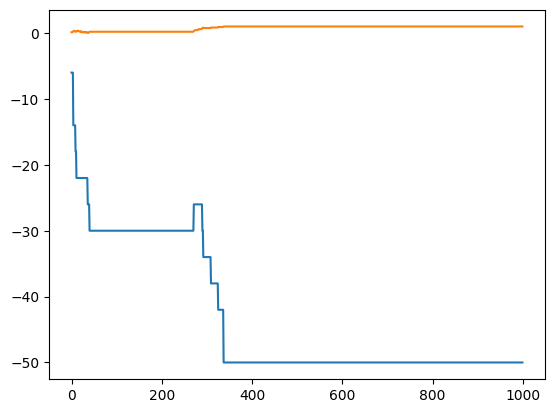

In [131]:
# beta = 1
_, _, E1, m1 = func3(func1(5), 1000)
plt.plot(E1)
plt.plot(m1) # 1로 수렴

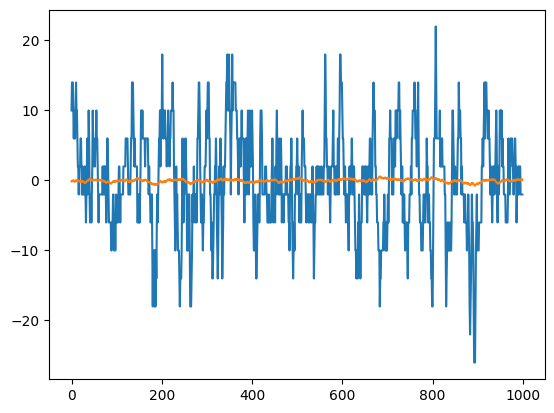

In [132]:
# beta = 0
_, _, E2, m2 = func3(func1(5), 1000, 0)
plt.plot(E2)
plt.plot(m2) # 0에서 왔다갔다

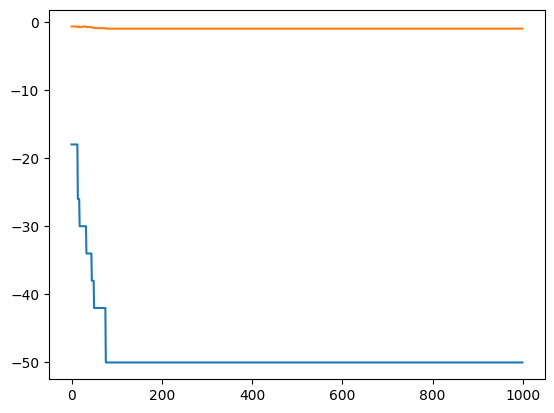

In [133]:
# beta = 10
_, _, E3, m3 = func3(func1(5), 1000, 10)
plt.plot(E3)
plt.plot(m3) # 1로 수렴